<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slp       303 non-null    int64  
 10  caa       303 non-null    int64  
 11  thall     303 non-null    int64  
 12  exng      303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


               age       sex        cp    trtbps      chol       fbs  rest_ecg  thalachh   oldpeak       slp       caa     thall      exng    output
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308 -0.116211 -0.398522  0.210013 -0.168814  0.276326  0.068001  0.096801 -0.225439
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032 -0.058196 -0.044020  0.096093 -0.030711  0.118261  0.210041  0.141664 -0.280937
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444  0.044421  0.295762 -0.149230  0.119717 -0.181053 -0.161736 -0.394280  0.433798
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531 -0.114103 -0.046698  0.193216 -0.121475  0.101389  0.062210  0.067616 -0.144931
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294 -0.151040 -0.009940  0.053952 -0.004038  0.070511  0.098803  0.067023 -0.085239
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000 -0.084189 -0.008567  0.005747 -0.0598

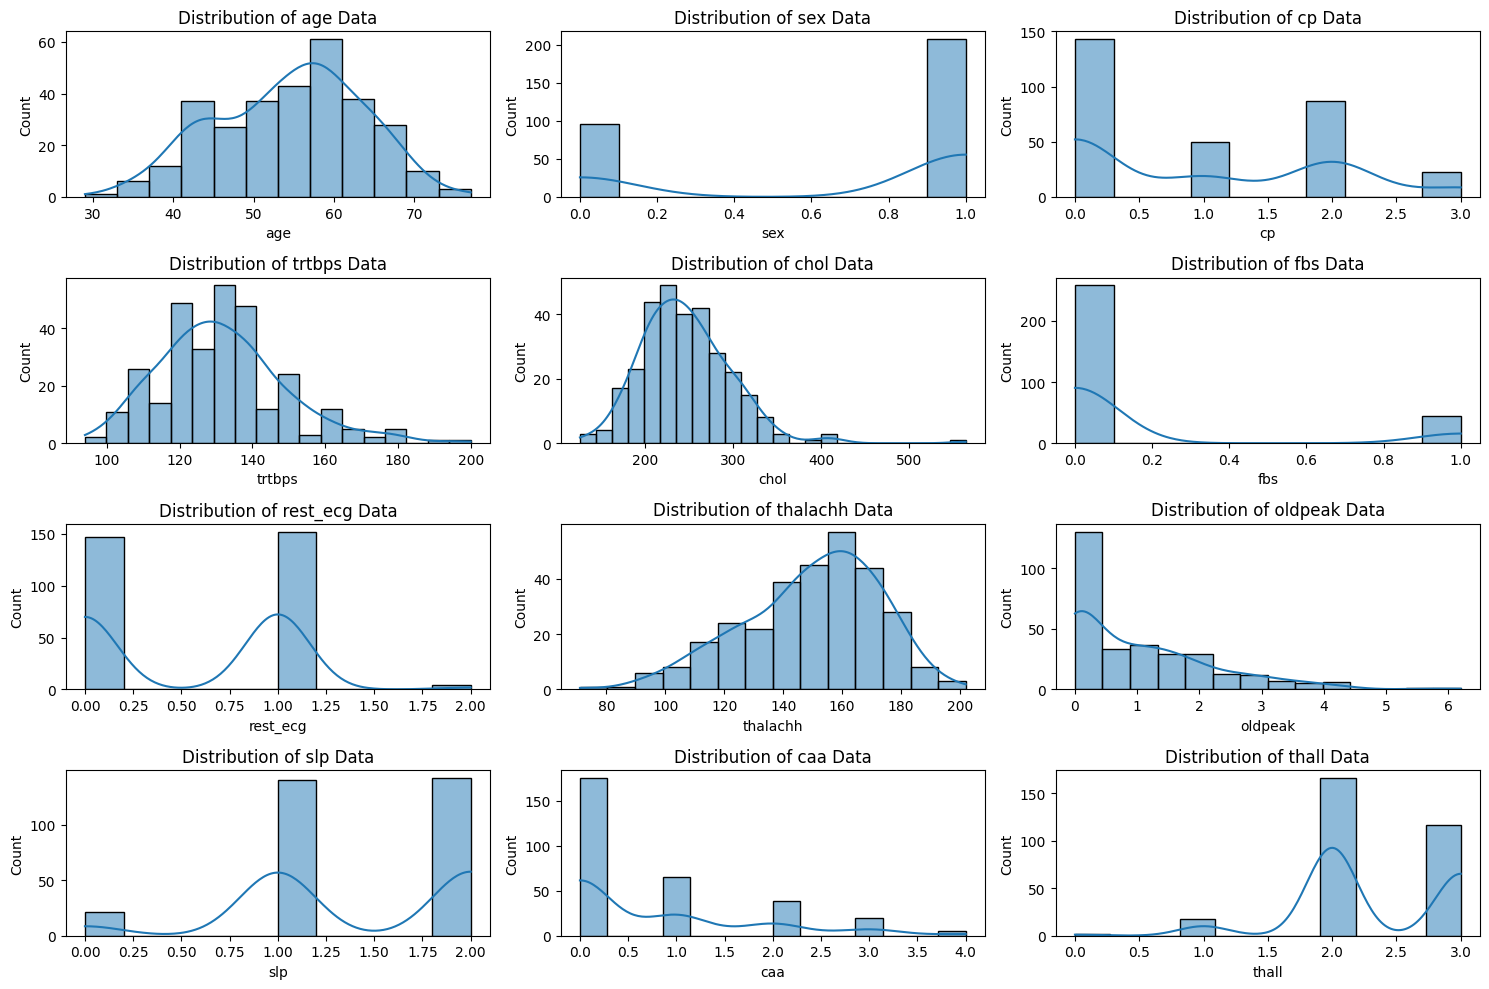

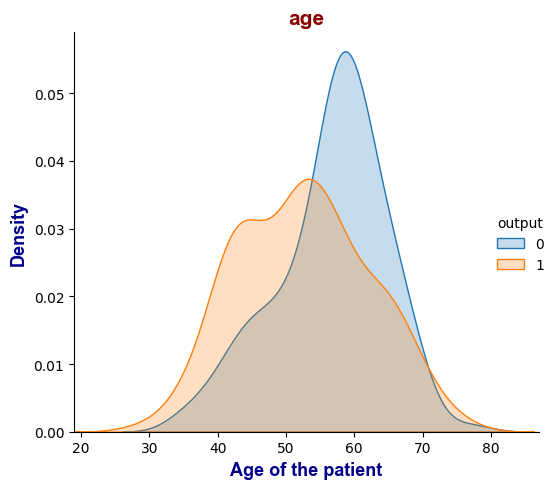

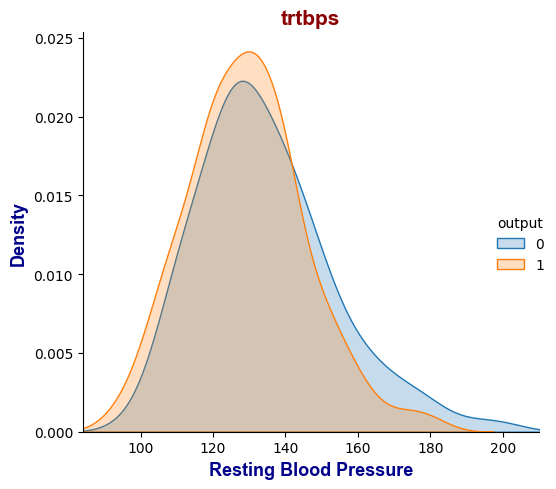

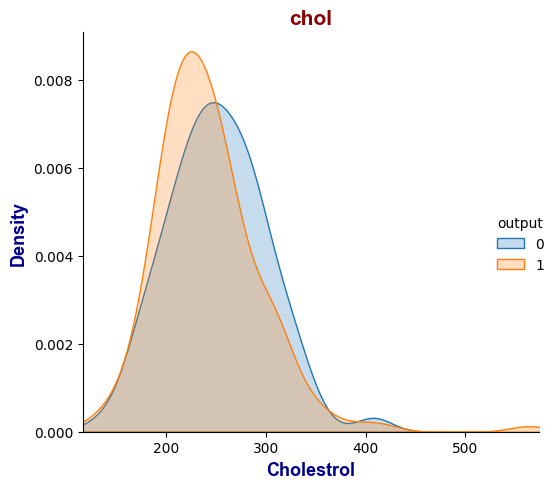

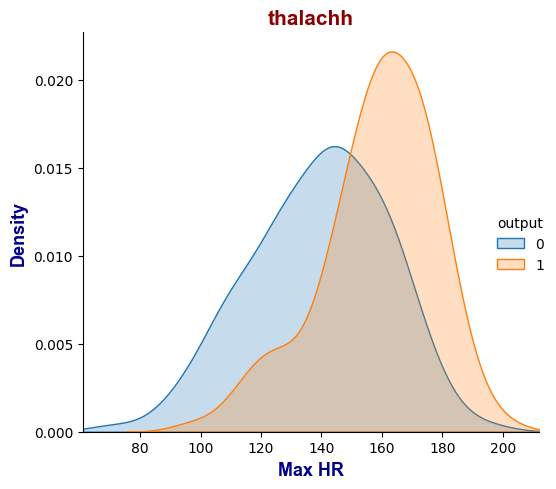

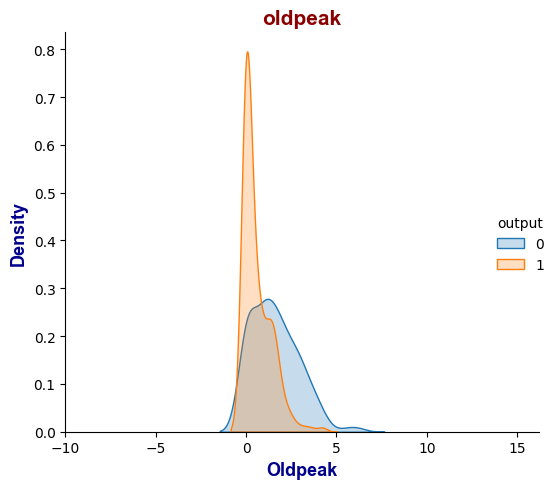

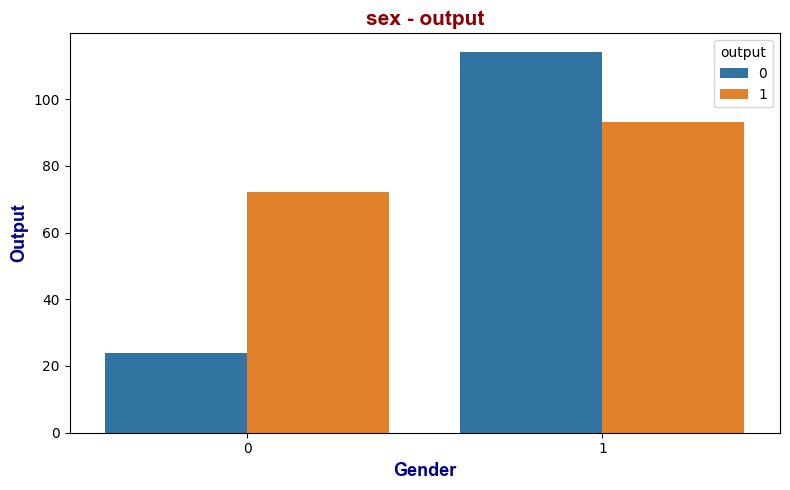

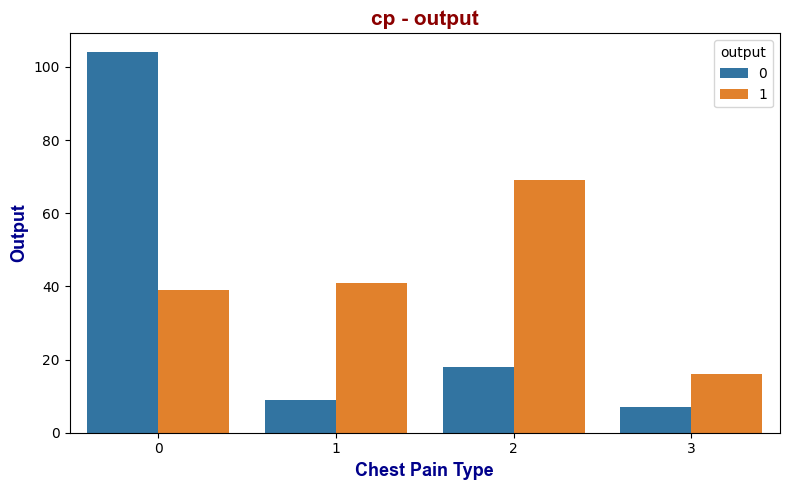

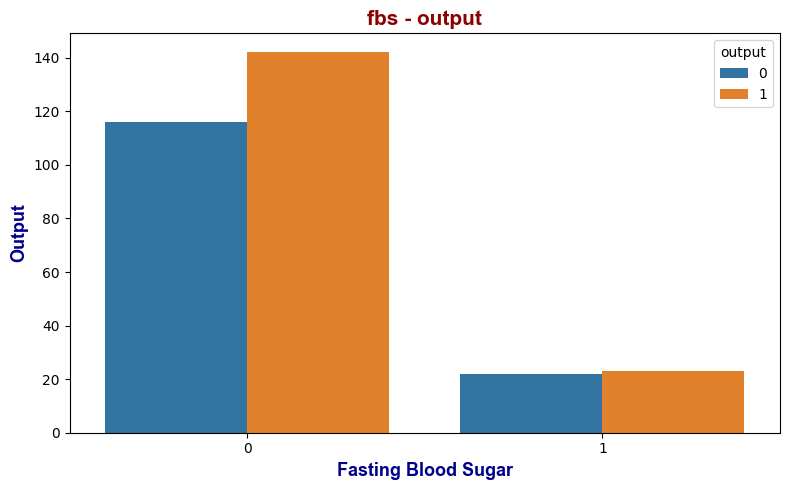

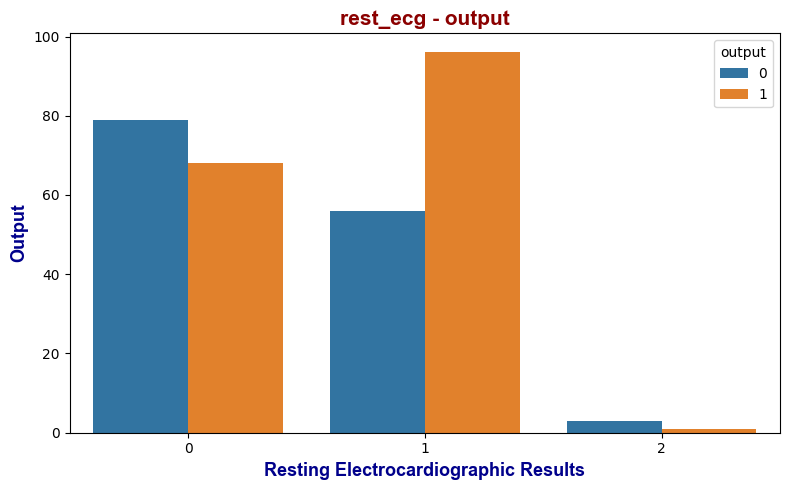

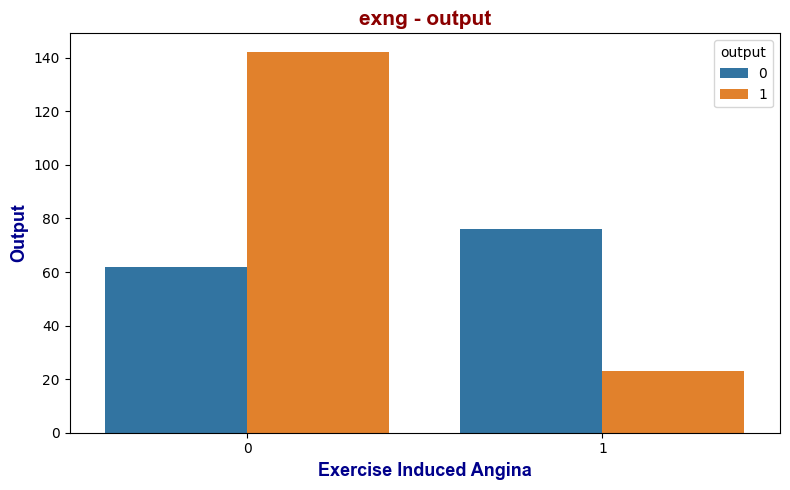

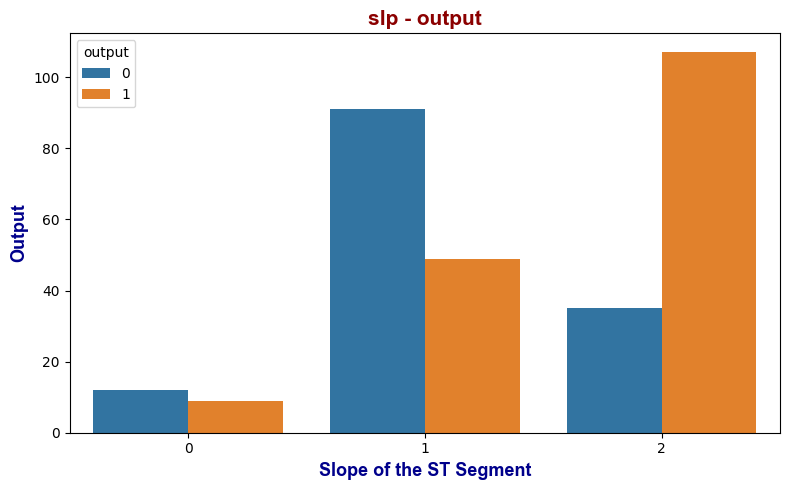

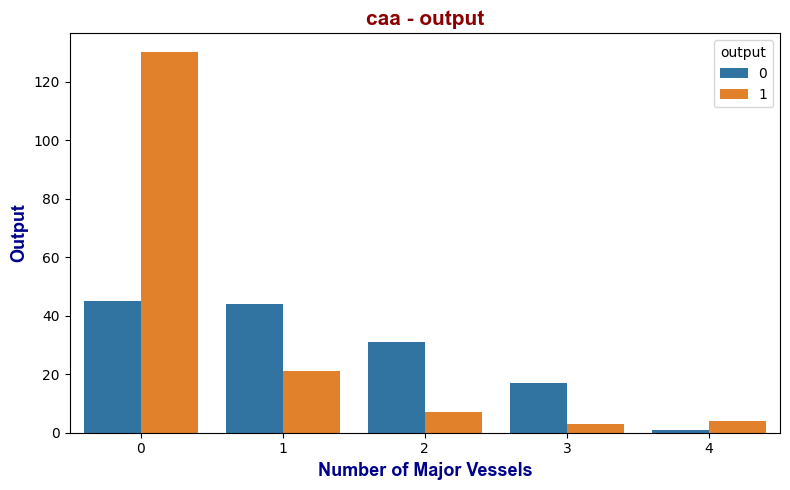

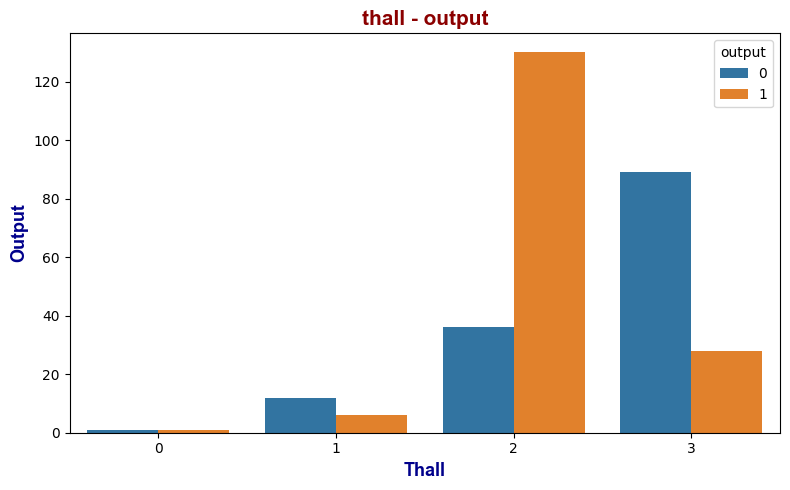

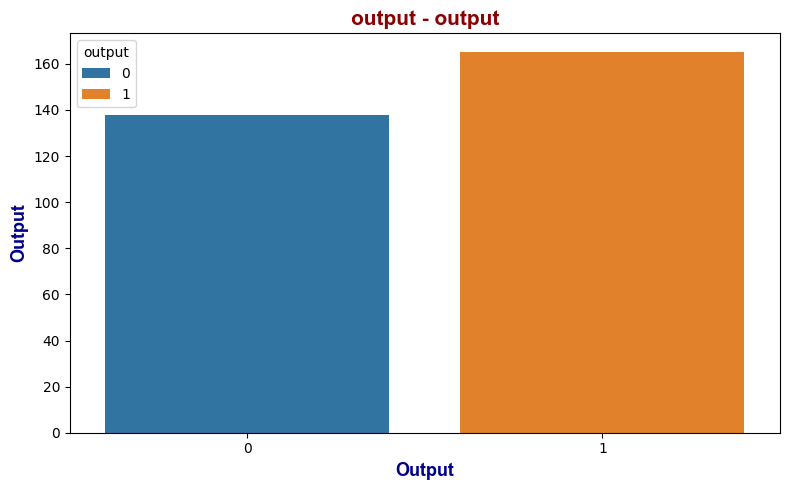

The accuracy of Random Forest algorithm is: 85.24590163934425 %
The accuracy of SVC algorithm is:  88.52459016393442 %


In [20]:
# imports
import csv
import os
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import requests
warnings.filterwarnings("ignore")


# Load the data & various visualizations & checks
heartds = pd.read_csv('https://raw.githubusercontent.com/orionmc/dspp_s2/937d852254a4d186dccfee6be91e48fd885b512f/heart0.csv')

heartds.head()
heartds.info()
heartds[heartds.duplicated()]
heartds.describe()
# heartds.describe().T # matrix rotated 90 degrees

# pick suitable colour for the plot and draw the correlation plot
fig = px.imshow(heartds.corr(),title="Correlation Matrix",color_continuous_scale="viridis")
fig.show()

# Numerical correlation matrix
numeric_corr_matrix = heartds.corr()
print(numeric_corr_matrix.to_string())

# Graph distribution & linearity of the variables
plt.figure(figsize=(15,10))
for i,col in enumerate(heartds.columns[:-2],1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heartds[col],kde=True)
    plt.tight_layout()
    plt.plot()

# Numeric & Categorical Variables
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exng", "slp", "caa", "thall", "output"]
numeric_var.append("output")

numeric_axis_name = ["Age of the patient", "Resting Blood Pressure", "Cholestrol", "Max HR", "Oldpeak"]
zipped_list_for_numeric = list(zip(numeric_var, numeric_axis_name))

categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood Sugar", "Resting Electrocardiographic Results",
                       "Exercise Induced Angina", "Slope of the ST Segment", "Number of Major Vessels", "Thall", "Output"]
zipped_list_for_categoric = list(zip(categoric_var, categoric_axis_name))

title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 15}
axis_font = {"family": "arial", "color": "darkblue", "weight": "bold", "size": 13}

# Draing graphs for numeric variables
for i,z in zipped_list_for_numeric:
    fig = sns.FacetGrid(heartds[numeric_var], hue = 'output', height = 5, xlim = ((heartds[i].min() - 10), (heartds[i].max() + 10)))
    fig.map(sns.kdeplot, i, shade = True)
    #graph.map(sns.histplot, i, bins=10) # different visualisation if needed
    fig.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()
# Drawing graphs for categorical variables
for i,z in zipped_list_for_categoric:
    plt.figure(figsize = (8, 5))
    sns.countplot(x = i, data = heartds[categoric_var], hue = "output")
    
    plt.title(i + " - output", fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Output", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

# Data Preprocessing
x = heartds.iloc[:, 1:-1].values
y = heartds.iloc[:, -1].values
# print(x,y)

# Splitting the dataset into training and testing dataset 20%-80%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# x_train,x_test

# Random Forest
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest algorithm is:", accuracy_score(y_test, predicted.round())*100, "%")

# Support Vector Classification
model = SVC()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print("The accuracy of SVC algorithm is: ", accuracy_score(y_test, predicted)*100, "%")






